In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA READING**

In [56]:
df_insurance = pd.read_csv('/content/insurance.csv')

In [57]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
df_insurance.shape

(1338, 7)

In [59]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df_insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [62]:
df_insurance.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [63]:
df_insurance.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [64]:
#categorical columns
numerical_col=df_insurance.select_dtypes(include=np.number).columns.to_list()
categorical_col=df_insurance.select_dtypes(include='O').columns.to_list()
categorical_col

['sex', 'smoker', 'region']

**Visualizing the data**

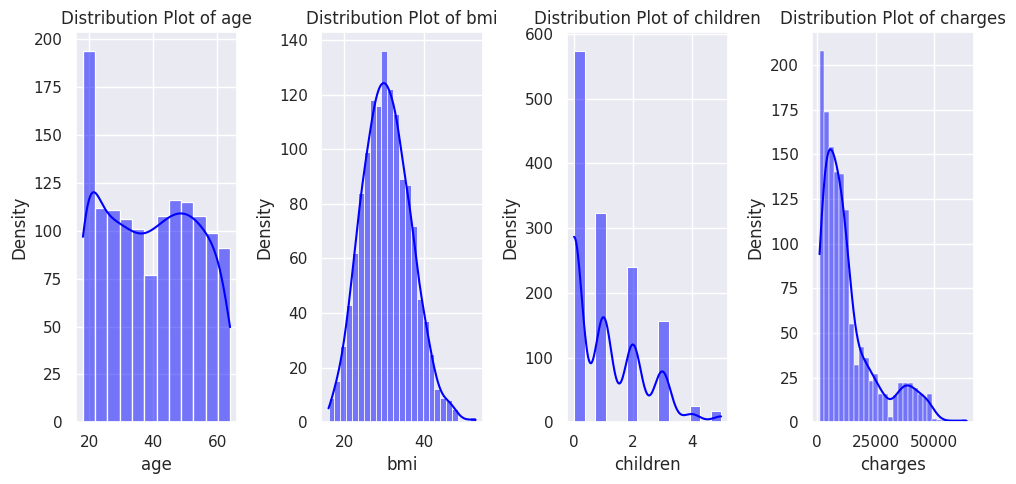

In [65]:
plt.figure(figsize=(10,5))
for i,col in enumerate(numerical_col):
    plt.subplot(1,4,i+1)
    sns.histplot(df_insurance[col],kde=True,color='blue')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {col}')
plt.show()

The above histogram reveals about the shape of the distribution of each numerical column

If the histogram is skewed to the right(positive skewness) the bulk of the data is concentrated on the left side and if it is skewed on left (negative skewness) the bulk of the data is on the right.

<ipython-input-66-038904486784>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_insurance[i],palette='Set1')


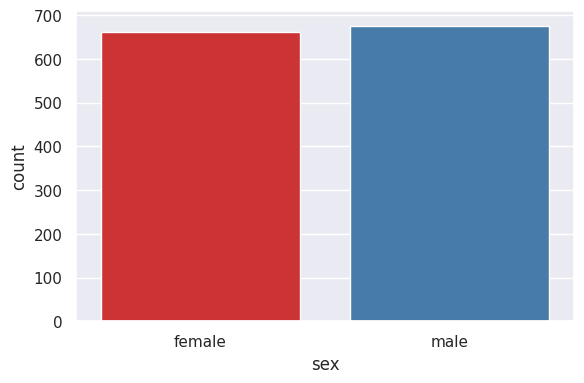

<ipython-input-66-038904486784>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_insurance[i],palette='Set1')


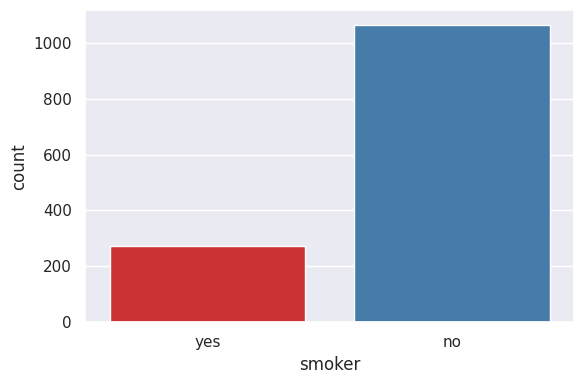

<ipython-input-66-038904486784>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_insurance[i],palette='Set1')


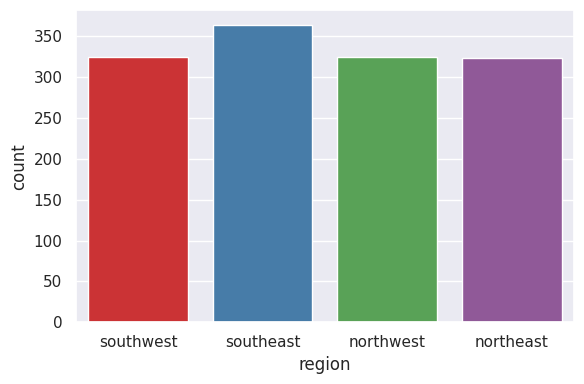

In [66]:
for i in categorical_col:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_insurance[i],palette='Set1')
    plt.tight_layout()
    plt.show()

<ipython-input-67-2a8e1d11e0df>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_insurance['age'], hue=df_insurance['smoker'], shade=True, bw_adjust=.5)


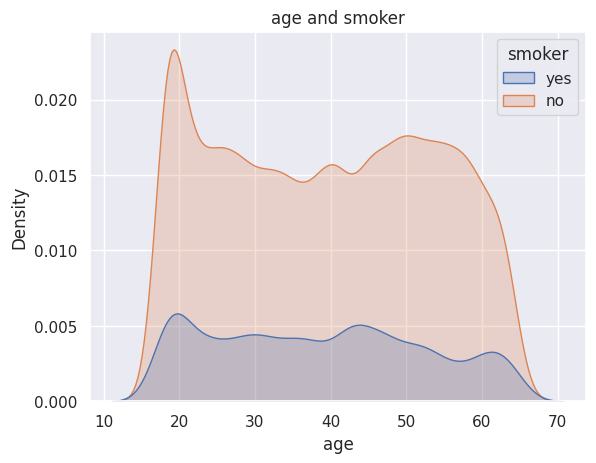

In [67]:
#relation between age and smoking
sns.kdeplot(x=df_insurance['age'], hue=df_insurance['smoker'], shade=True, bw_adjust=.5)
plt.title('age and smoker')
plt.show()

The above plot shows various age distribution between a smoker and non smoker.

The orange area represents non-smokers, and it covers a wide range of ages, with a peak in the younger age group (around 20 years old).

The blue line represents smokers. It shows that smokers are present across different age groups, with a noticeable concentration around ages 20 and 50.


<ipython-input-68-a5d796f668ac>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_insurance['bmi'], hue=df_insurance['smoker'], shade=True, bw_adjust=.5)


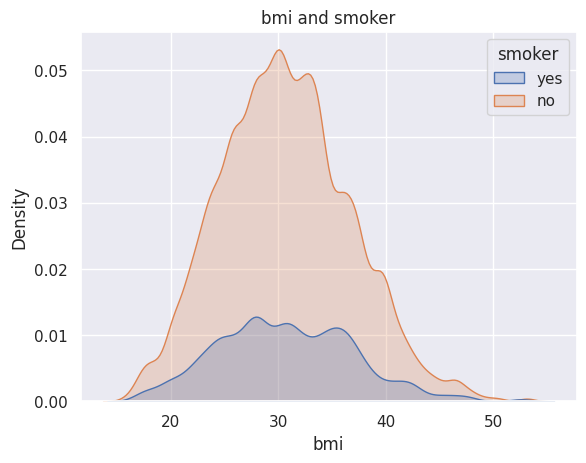

In [68]:
#relation between BMI and smoking
sns.kdeplot(x=df_insurance['bmi'], hue=df_insurance['smoker'], shade=True, bw_adjust=.5)
plt.title('bmi and smoker')
plt.show()

The orange area represents non-smokers. It shows that non-smokers have a wide range of BMI values, with a peak around a BMI of 30.

The blue line represents smokers. Smokers also have a range of BMI values, but the density is lower compared to non-smokers, and it has a slightly different distribution, with a peak around a BMI of 30 as well.

<Axes: xlabel='region', ylabel='count'>

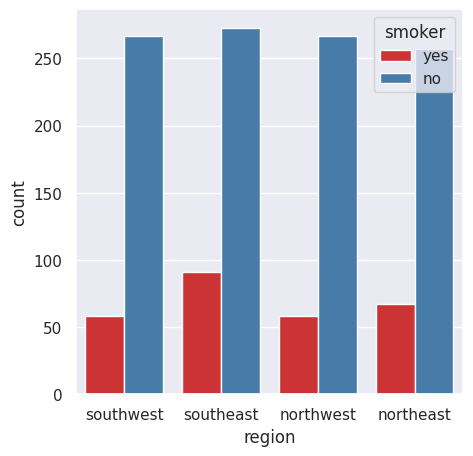

In [69]:
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
sns.countplot(x='region',hue='smoker',data=df_insurance,palette='Set1')

<Axes: xlabel='region', ylabel='count'>

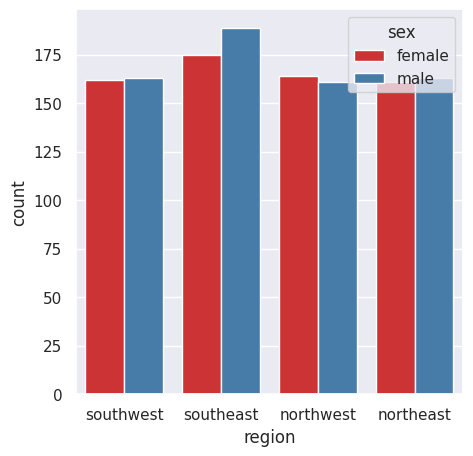

In [70]:
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
sns.countplot(x='region',hue='sex',data=df_insurance,palette='Set1')

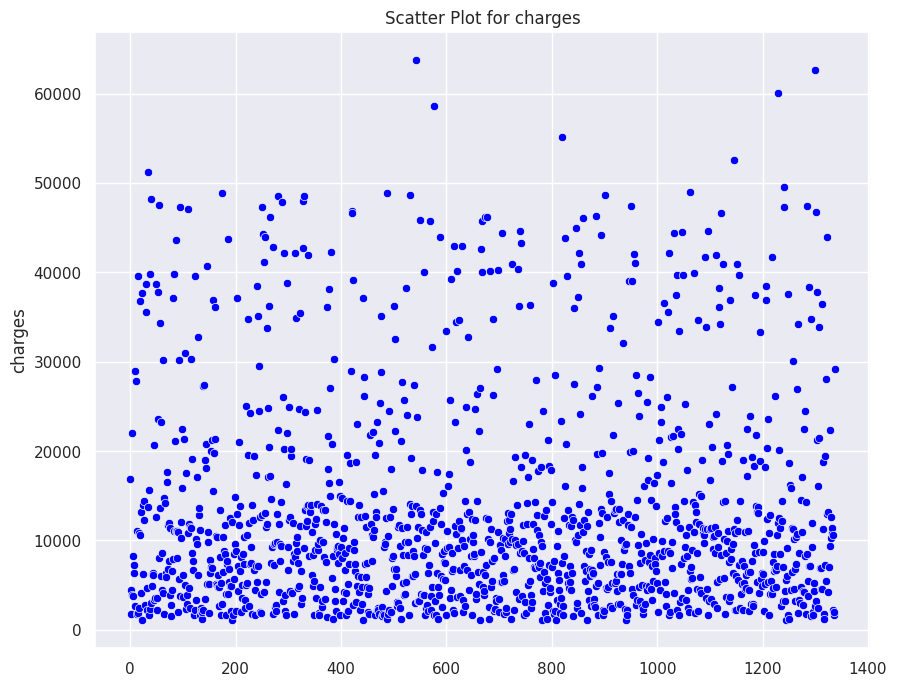

In [71]:
sns.scatterplot( data=df_insurance['charges'],color='blue')
plt.title('Scatter Plot for charges')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Each blue dot represents an individual entry or case in the dataset.

The y-axis values, which range from 0 to over 60,000, suggest that there are some entries with very high charges, but most charges seem to be clustered between 0 and 20,000.

In simple terms, the plot shows a wide range of charges across different cases, with most cases having relatively lower charges, and fewer cases having very high charges. The distribution appears to be spread out, indicating variability in the charges

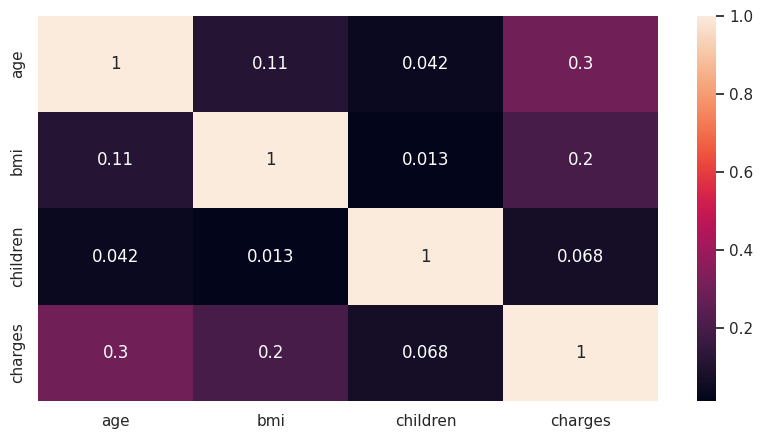

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(df_insurance[numerical_col].corr(),annot=True)
plt.show()

**FEATURE ENGINEERING**

In [73]:
df_insurance['age'].min

<bound method Series.min of 0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64>

In [74]:
group_age=[]
for i in range(len(df_insurance)):
    if df_insurance['age'][i]<20:
        group_age.append(0)
    elif df_insurance['age'][i]<30:
        group_age.append(1)
    elif df_insurance['age'][i]<40:
        group_age.append(2)
    elif df_insurance['age'][i]<50:
        group_age.append(3)
    elif df_insurance['age'][i]<60:
        group_age.append(4)
    else:
        group_age.append(5)
df_insurance['group_age']=pd.DataFrame(group_age)

In [75]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,group_age
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2


**DataPreProcessing**

In [76]:
df_insurance.drop_duplicates(inplace=True)

In [77]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [78]:
from operator import le
le=LabelEncoder()
for col in categorical_col:
    df_insurance[col]=le.fit_transform(df_insurance[col])
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,group_age
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,2
4,32,1,28.880,0,0,1,3866.85520,2


In [79]:
x=df_insurance.drop(columns=['charges'])
y=df_insurance['charges']

In [80]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,GridSearchCV

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [82]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [83]:
print(x_train.shape)
print(x_test.shape)

(1069, 7)
(268, 7)


**MODELLING**

In [84]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [85]:
#LINEAR REGRESSION
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_squared_error:  35493073.952801205
train_score:  0.729718285994283
test_score:  0.806846788224291


In [86]:
#RANDOM FOREST
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

mean_squared_error:  22156843.016880497
train_score:  0.9737900504082893
test_score:  0.879422520652571


In [91]:
rf=RandomForestRegressor(
    criterion='friedman_mse', max_depth=4,
   max_features='sqrt', min_samples_split=10,
                      n_estimators=500
)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

mean_squared_error:  38375434.739367425
train_score:  0.7855064134056254
test_score:  0.7911609886747233


In [95]:
#XGB Regression
xgb=XGBRegressor(
max_depth = 3, n_estimators=50, learning_rate =.5
)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",xgb.score(x_train,y_train))
print("test_score: ",xgb.score(x_test,y_test))

mean_squared_error:  20215282.828497153
train_score:  0.9140580495211134
test_score:  0.8899884859093643


In [97]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


In [99]:
#CATBOOST
from catboost import CatBoostRegressor
cat=CatBoostRegressor(learning_rate =.05, max_depth =4, verbose = 0)
cat.fit(x_train,y_train)
y_pred=cat.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",cat.score(x_train,y_train))
print("test_score: ",cat.score(x_test,y_test))

mean_squared_error:  19242105.376204472
train_score:  0.9214350903873385
test_score:  0.8952845149540168


In [100]:
acc=[]
names=['LinearRegression','RandomForest','XGB','Catboost']
acc.extend([lr.score(x_test,y_test),rf.score(x_test,y_test),xgb.score(x_test,y_test),cat.score(x_test,y_test)])
acc

[0.806846788224291, 0.7911609886747233, 0.8899884859093643, 0.8952845149540168]

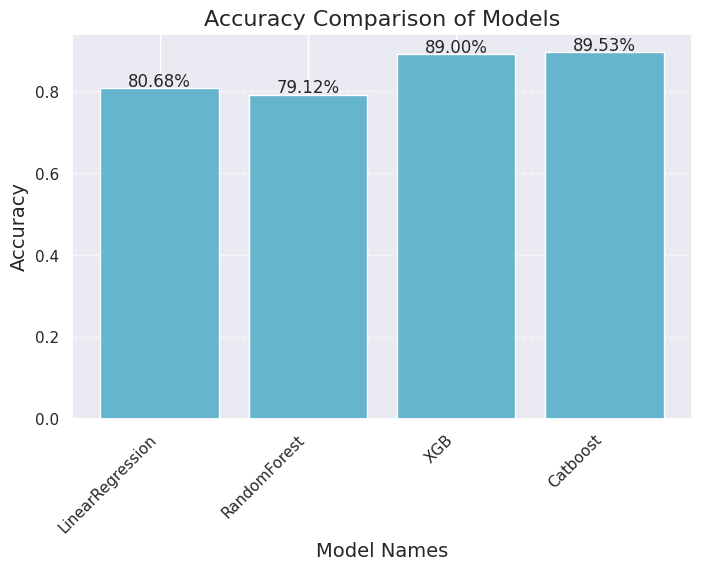

In [101]:
plt.figure(figsize=(8,5))

plt.bar(names, acc, color='c')
plt.title('Accuracy Comparison of Models', fontsize=16)
plt.xlabel('Model Names', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(acc):
    plt.text(i, value + 0.005 , f'{value*100:.2f}%', ha='center', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.show()